In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../../python_scripts')
from fourier import *

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
def rect(t):
    if np.abs(t) > 1/2:
        return 0
    elif np.abs(t) == 1/2:
        return 1/2
    else:
        return 1

func = rect

In [3]:
# Arguments
dt = .01 # dt : sample spacing 
N = 2500 # sample size (N/2 is the number the positive frequencies)

x, T = construct_discrete_signal_starting_from_0(dt, N, func)

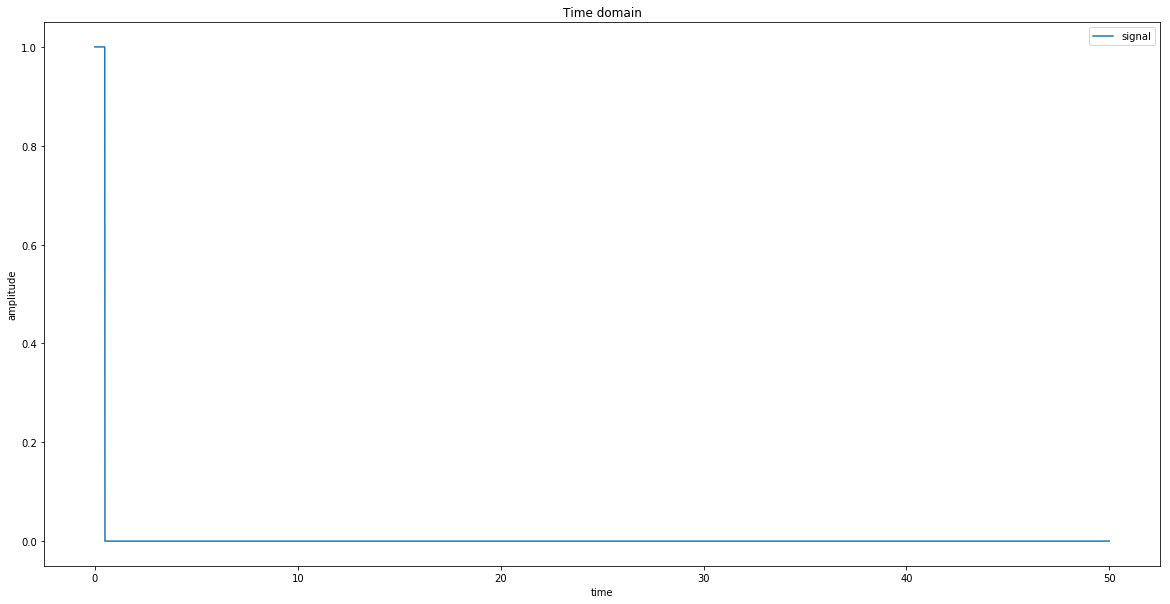

In [4]:
# Arguments
Xs = [T]
L = [x]
Labels = ["signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## DFT

https://en.wikipedia.org/wiki/funcangular_function#Fourier_transform_of_the_funcangular_function

We use the DFT to get the amplitudes associated to the frequencies.

**Remark**:
a normalization is necessary before getting the true amplitudes.

In [5]:
X_noshift, Xi, X = retrieve_frequencies(x, N, dt)
X = 1/(2*N)*X

In [6]:
C = get_cn(N, dt, Xi, func, T)

/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


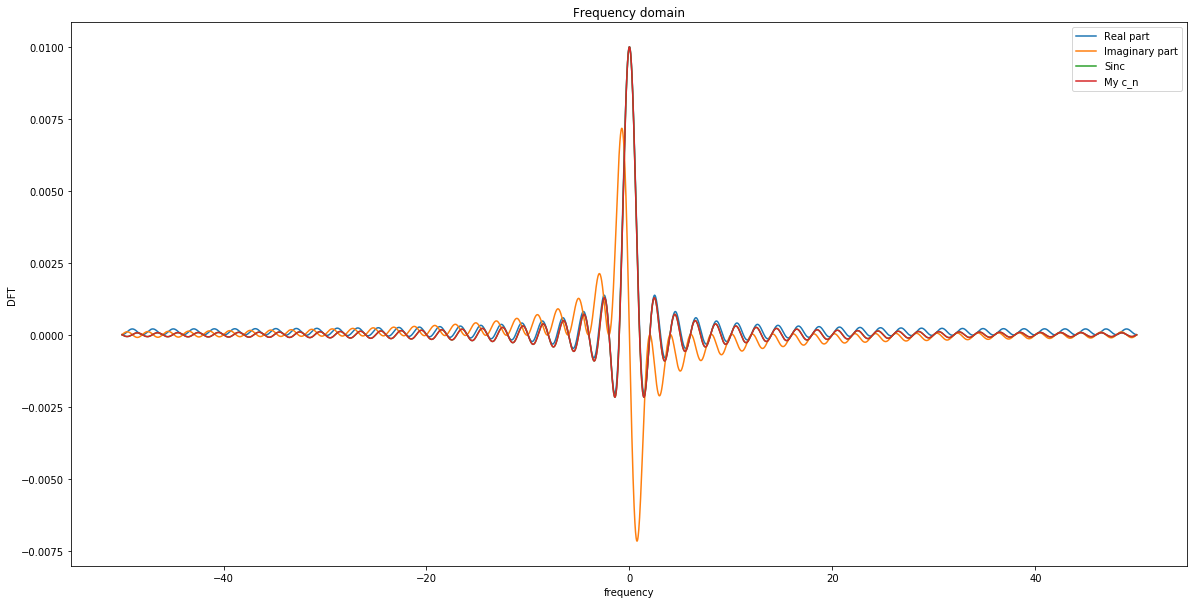

In [7]:
# Arguments
Xs = [Xi, Xi, Xi, Xi]
L = [np.real(X), np.imag(X), .5/(2*N*dt)*np.sinc(Xi), C]
Labels = ["Real part", "Imaginary part", "Sinc", "My c_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

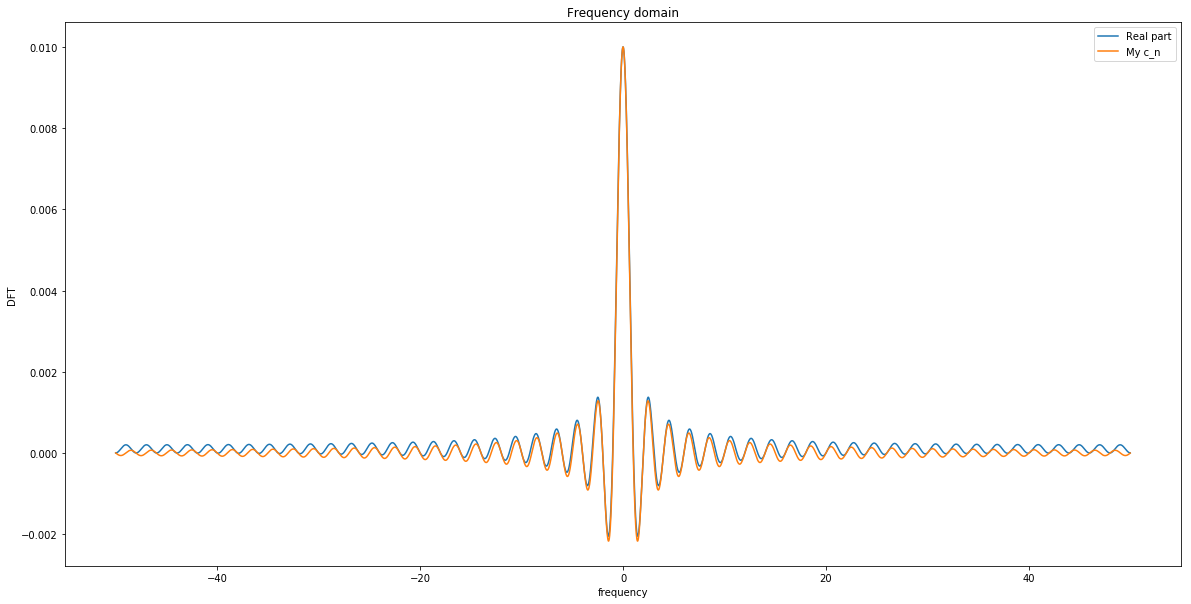

In [8]:
# Arguments
Xs = [Xi, Xi]
L = [np.real(X), C]
Labels = ["Real part", "My c_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

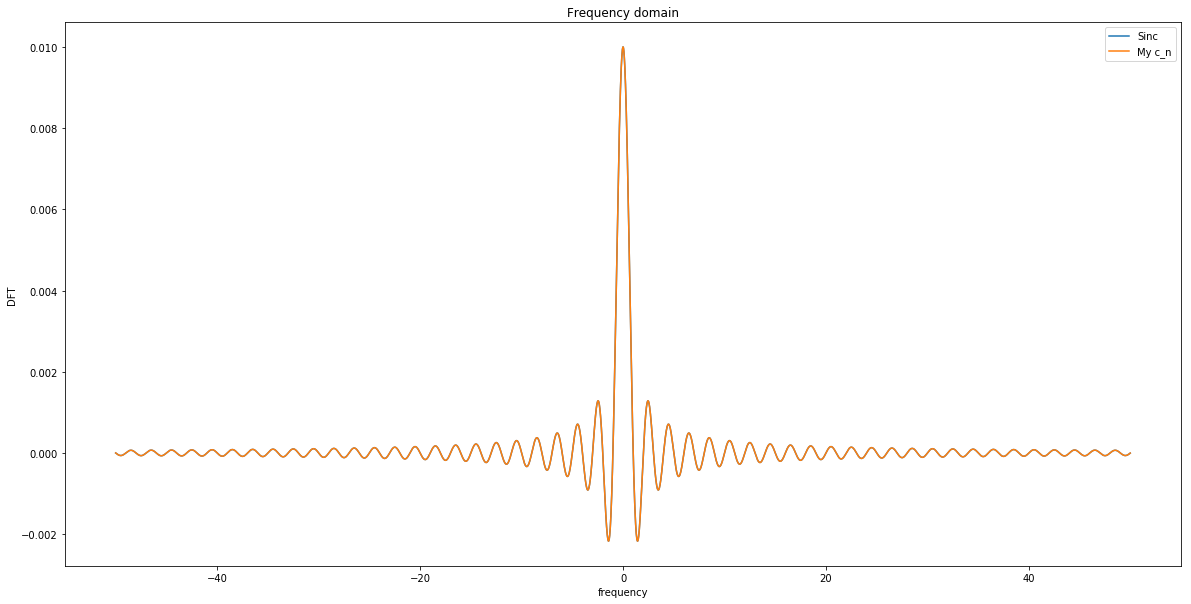

In [9]:
# Arguments
Xs = [Xi, Xi]
L = [.5/(2*N*dt)*np.sinc(Xi), C] # We multiply by .5 because we have half of the signal
Labels = ["Sinc", "My c_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## IDFT

From the amplitudes/values of the DFT we can recover the signal using the IDFT.

In [10]:
recovered_x = np.fft.ifft(X_noshift) # IDFT
error = np.abs(recovered_x.real - x) # we also compute the error between the original signal and the one returned by the IDFT

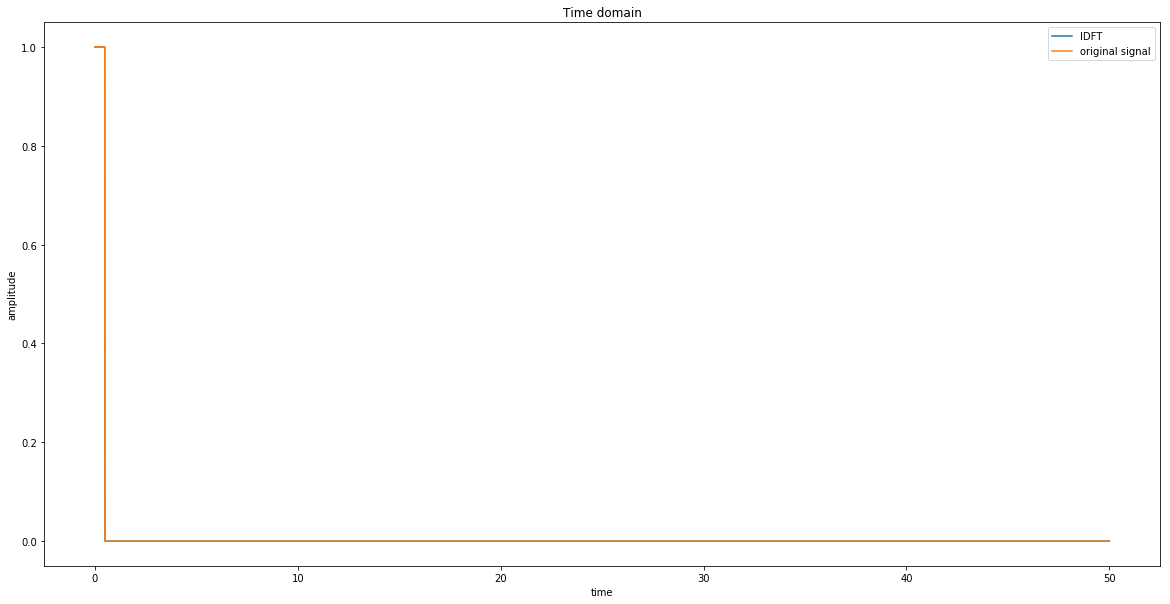

In [11]:
# Arguments
Xs = [T, T]
L = [recovered_x.real, x]
Labels = ["IDFT", "original signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

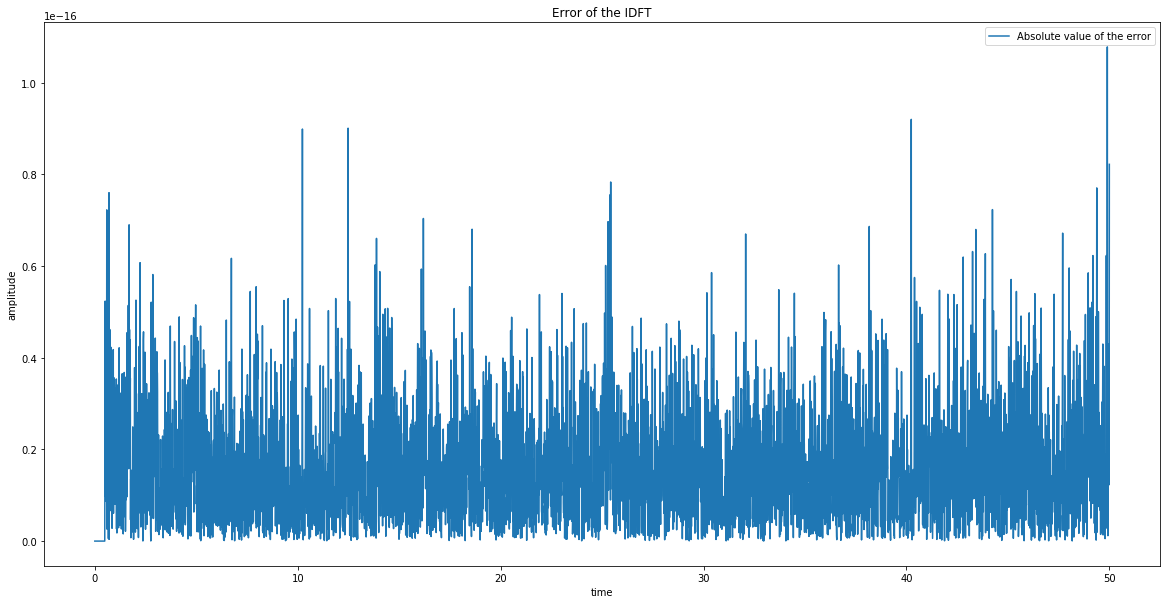

Maximum value of the error :  1.0781077635063558e-16


In [12]:
# Arguments
Xs = [T]
L = [error]
Labels = ["Absolute value of the error"]
title = "Error of the IDFT"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)
print("Maximum value of the error : ", np.amax(error))